### Compare cortical thickness measures across datasets
- NIMHANS
- QPN
- PPMI

In [13]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nibabel as nib
from nilearn import datasets, surface, plotting


In [27]:
projects_dir = f"/home/nikhil/projects/neuroinformatics_tools/" 

nimhans_serb_agg_data_dir = f"{projects_dir}/mr_proc-nimhans_serb/analysis/CT/agg_dfs/SERB/"
nimhans_metal_agg_data_dir = f"{projects_dir}/mr_proc-nimhans_serb/analysis/CT/agg_dfs/METAL/"
qpn_agg_data_dir = f"{projects_dir}/mr_proc-qpn/analysis/CT/agg_dfs/"
ppmi_agg_data_dir = f"{projects_dir}/mr_proc-ppmi/analysis/CT/agg_dfs/"

CT_DKT_csv = "CT_DKT_df.csv"
bilateral_vol_csv = "bilateral_vol_ASEG_df.csv"
global_vol_csv = "global_vol_ASEG_df.csv"

# save dirs
figs_dir = "../figs/population_comparisons"

demo_cols = ["participant_id","age","sex","group","hemi","dataset"]

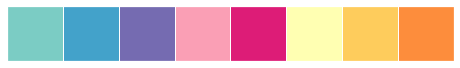

In [28]:
from enum import Enum
class my_colors(Enum):
    NIM_CONTROL = "#7bccc4"
    NIM_SERB_PD = "#43a2ca"
    NIM_METAL_PD = "#756bb1"
    QPN_CONTROL = "#fa9fb5"
    QPN_PD = "#dd1c77"
    PPMI_CONTROL = "#ffffb2"
    PPMI_PRODROMAL = "#fecc5c"
    PPMI_PD = "#fd8d3c"
    
color_list = [my_colors.NIM_CONTROL.value, my_colors.NIM_SERB_PD.value, my_colors.NIM_METAL_PD.value, 
              my_colors.QPN_CONTROL.value, my_colors.QPN_PD.value, 
              my_colors.PPMI_CONTROL.value, my_colors.PPMI_PRODROMAL.value, my_colors.PPMI_PD.value]

palette = sns.color_palette(palette=color_list) #sns.husl_palette()

hue_order = ["NIMHANS_SERB-control", "NIMHANS_SERB-PD", "NIMHANS_METAL-PD", "QPN-control", "QPN-PD", "PPMI-control", "PPMI-prodromal", "PPMI-PD"]

sns.palplot(palette)

### Read data

In [29]:
match_age = True
age_thresh = 63

In [30]:
# NIMHANS (SERB + METAL)
nimhans_serb_CT_DKT_df = pd.read_csv(f"{nimhans_serb_agg_data_dir}{CT_DKT_csv}").drop(columns=["Unnamed: 0"])
nimhans_serb_CT_DKT_df["dataset"] = "NIMHANS_SERB"
n_nimhans_serb_participants = len(nimhans_serb_CT_DKT_df["participant_id"].unique())

nimhans_metal_CT_DKT_df = pd.read_csv(f"{nimhans_metal_agg_data_dir}{CT_DKT_csv}").drop(columns=["Unnamed: 0"])
nimhans_metal_CT_DKT_df["dataset"] = "NIMHANS_METAL"
n_nimhans_metal_participants = len(nimhans_metal_CT_DKT_df["participant_id"].unique())

# QPN
qpn_CT_DKT_df = pd.read_csv(f"{qpn_agg_data_dir}{CT_DKT_csv}").drop(columns=["Unnamed: 0"])
qpn_CT_DKT_df["dataset"] = "QPN"
n_qpn_participants = len(qpn_CT_DKT_df["participant_id"].unique())

# PPMI
ppmi_CT_DKT_df = pd.read_csv(f"{ppmi_agg_data_dir}{CT_DKT_csv}").drop(columns=["Unnamed: 0"])
ppmi_CT_DKT_df["dataset"] = "PPMI"
n_ppmi_participants = len(ppmi_CT_DKT_df["participant_id"].unique())

print(f"n_nimhans_participants: {(n_nimhans_serb_participants, n_nimhans_metal_participants)}, n_qpn_participants (all):{n_qpn_participants}, n_ppmi_participants: {n_ppmi_participants}")

if match_age:
    print(f"Matching age < {age_thresh}")
    qpn_CT_DKT_df = qpn_CT_DKT_df[qpn_CT_DKT_df["age"]<age_thresh]
    ppmi_CT_DKT_df = ppmi_CT_DKT_df[ppmi_CT_DKT_df["age"]<age_thresh]

    n_qpn_participants = len(qpn_CT_DKT_df["participant_id"].unique())
    n_ppmi_participants = len(ppmi_CT_DKT_df["participant_id"].unique())

    print(f"n_nimhans_participants: {(n_nimhans_serb_participants, n_nimhans_metal_participants)}, n_qpn_participants (young):{n_qpn_participants}, n_ppmi_participants: {n_ppmi_participants}")

# Concat
CT_DKT_df = pd.concat([nimhans_serb_CT_DKT_df, nimhans_metal_CT_DKT_df, qpn_CT_DKT_df, ppmi_CT_DKT_df], axis=0)
CT_DKT_df["ds_group"] = CT_DKT_df["dataset"] + "-" + CT_DKT_df["group"]
print(f"CT_DKT_df shape: {CT_DKT_df.shape}, n_total_participants: {len(CT_DKT_df['participant_id'].unique())}")
CT_DKT_df.head()

n_nimhans_participants: (86, 66), n_qpn_participants (all):201, n_ppmi_participants: 406
Matching age < 63
n_nimhans_participants: (86, 66), n_qpn_participants (young):81, n_ppmi_participants: 195
CT_DKT_df shape: (856, 38), n_total_participants: 428


,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,fusiform,inferiorparietal,inferiortemporal,insula,isthmuscingulate,lateraloccipital,...,superiortemporal,supramarginal,transversetemporal,participant_id,age,sex,group,hemi,dataset,ds_group
0,2.643,2.648,1.866,3.932,3.098,2.638,2.969,3.294,2.312,2.189,...,3.044,2.717,2.386,SERB088,54.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD
1,3.230,2.844,1.941,3.825,2.900,2.479,3.003,3.427,2.308,2.365,...,2.998,2.589,1.971,SERB058,64.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD
2,2.756,2.717,1.997,3.036,2.709,2.457,2.875,3.183,2.388,2.123,...,2.912,2.526,1.875,SERB049,62.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD
3,2.974,2.603,1.819,3.802,2.701,2.399,2.947,3.205,2.468,2.364,...,2.928,2.532,2.250,SERB084,NaN,NaN,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD
4,3.015,2.939,1.998,4.177,3.054,2.831,3.403,3.701,2.462,2.382,...,3.118,2.933,2.776,SERB063,56.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD


### Subsample QPN to match age

In [24]:
CT_DKT_df.groupby(["dataset","group"])["age"].describe()

count       mean        std   min    25%   50%  \
dataset       group                                                       
NIMHANS_METAL PD         118.0  53.644068  10.089790  24.0  46.00  55.0   
NIMHANS_SERB  PD         108.0  55.388889   7.165381  36.0  50.00  56.0   
              control     30.0  52.000000   5.907330  41.0  48.50  53.0   
PPMI          PD         210.0  54.247619   5.691900  38.0  50.00  55.0   
              control     84.0  51.642857   7.890276  31.0  46.00  53.5   
              prodromal   96.0  56.187500   4.427932  42.0  53.75  57.0   
QPN           PD         136.0  55.961765   5.279760  40.9  53.20  57.1   
              control     26.0  52.515385   7.628247  37.7  49.80  55.4   

                           75%   max  
dataset       group                   
NIMHANS_METAL PD         61.00  72.0  
NIMHANS_SERB  PD         61.00  67.0  
              control    56.75  60.0  
PPMI          PD         59.00  62.0  
              control    58.00  62.0  
              prodromal  60.00  62.0  
QPN           PD         60.05  62.9  
              control    57.60  62.6

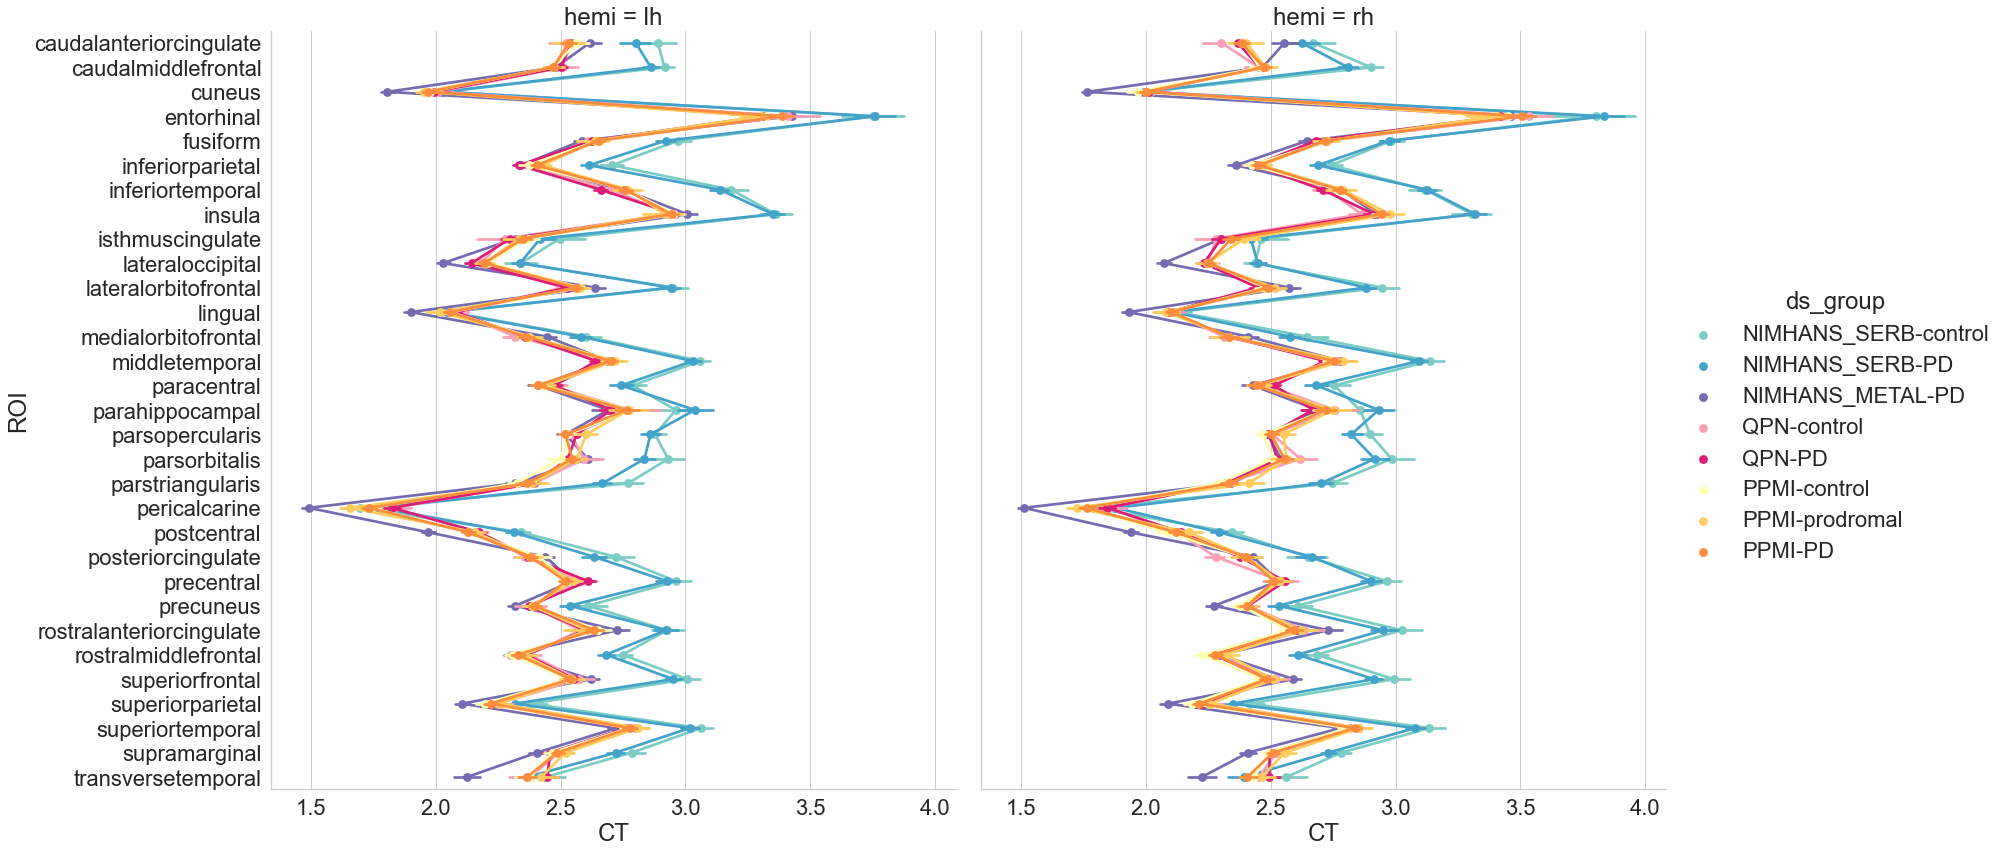

In [25]:
save_fig = False

CT_DKT_df_melt = CT_DKT_df.melt(
    id_vars=demo_cols + ["ds_group"],
    var_name="ROI", 
    value_name="CT")

plot_df = CT_DKT_df_melt.copy()
plot_df["ROI"] = plot_df["ROI"].astype(str)

sns.set(font_scale=2)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y="ROI",x="CT", hue="ds_group", col="hemi",kind="point",palette=palette, hue_order=hue_order, legend=True,
                    data=plot_df, aspect=1, height=12)
    # g.tick_params(axis='x', rotation=90, labelsize=14)

if save_fig:
    g.savefig(f"{figs_dir}/DKT.png")

### Aseg bilateral volume

In [31]:
# NIMHANS (SERB + METAL)
nimhans_serb_hemi_ASEG_df = pd.read_csv(f"{nimhans_serb_agg_data_dir}{bilateral_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_serb_hemi_ASEG_df["dataset"] = "NIMHANS_SERB"
n_nimhans_serb_participants = len(nimhans_serb_hemi_ASEG_df["participant_id"].unique())

nimhans_metal_hemi_ASEG_df = pd.read_csv(f"{nimhans_metal_agg_data_dir}{bilateral_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_metal_hemi_ASEG_df["dataset"] = "NIMHANS_METAL"
n_nimhans_metal_participants = len(nimhans_metal_hemi_ASEG_df["participant_id"].unique())

# QPN
qpn_hemi_ASEG_df = pd.read_csv(f"{qpn_agg_data_dir}{bilateral_vol_csv}").drop(columns=["Unnamed: 0"])
qpn_hemi_ASEG_df["dataset"] = "QPN"
n_qpn_participants = len(qpn_hemi_ASEG_df["participant_id"].unique())

# PPMI
ppmi_hemi_ASEG_df = pd.read_csv(f"{ppmi_agg_data_dir}{bilateral_vol_csv}").drop(columns=["Unnamed: 0"])
ppmi_hemi_ASEG_df["dataset"] = "PPMI"
n_ppmi_participants = len(ppmi_hemi_ASEG_df["participant_id"].unique())

print(f"n_nimhans_participants: {(n_nimhans_serb_participants,n_nimhans_metal_participants)}, n_qpn_participants:{n_qpn_participants}")

if match_age:
    print(f"Matching age < {age_thresh}")

    ppmi_hemi_ASEG_df = ppmi_hemi_ASEG_df[ppmi_hemi_ASEG_df["age"]<age_thresh]
    n_ppmi_participants = len(ppmi_hemi_ASEG_df["participant_id"].unique())

    qpn_hemi_ASEG_df = qpn_hemi_ASEG_df[qpn_hemi_ASEG_df["age"]<age_thresh]
    n_qpn_participants = len(qpn_hemi_ASEG_df["participant_id"].unique())
    print(f"n_nimhans_participants: {(n_nimhans_serb_participants,n_nimhans_metal_participants)}, n_qpn_participants:{n_qpn_participants}, n_ppmi_participants: {n_ppmi_participants}")


# Concat
hemi_ASEG_df = pd.concat([nimhans_serb_hemi_ASEG_df, nimhans_metal_hemi_ASEG_df, qpn_hemi_ASEG_df, ppmi_hemi_ASEG_df], axis=0)
hemi_ASEG_df["ds_group"] = hemi_ASEG_df["dataset"] + "-" + hemi_ASEG_df["group"]
print(f"hemi_ASEG_df shape: {hemi_ASEG_df.shape}")
hemi_ASEG_df.head()

n_nimhans_participants: (86, 66), n_qpn_participants:201
Matching age < 63
n_nimhans_participants: (86, 66), n_qpn_participants (young):81
hemi_ASEG_df shape: (856, 21)


,Lateral-Ventricle,Accumbens-area,Cerebellum-Cortex,vessel,VentralDC,Cerebellum-White-Matter,Amygdala,Caudate,Thalamus-Proper,Inf-Lat-Vent,...,choroid-plexus,Putamen,Hippocampus,participant_id,age,sex,group,hemi,dataset,ds_group
0,9170.500000,394.600006,49608.800781,125.800003,3958.899902,14102.900391,1659.300049,3355.899902,6357.399902,305.000000,...,684.400024,4586.500000,3580.399902,SERB088,54.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD
1,7667.399902,177.800003,42569.199219,24.000000,3381.600098,12641.299805,1223.000000,2633.600098,5716.799805,499.500000,...,623.900024,3512.899902,3400.500000,SERB058,64.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD
2,16945.599609,431.500000,50561.199219,29.299999,3974.399902,20009.800781,1357.099976,3021.699951,6195.899902,773.900024,...,1066.400024,4779.700195,3541.500000,SERB049,62.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD
3,10064.700195,349.500000,41859.898438,13.900000,3525.199951,10348.900391,1344.599976,1672.599976,5412.100098,195.899994,...,818.299988,2910.699951,3827.000000,SERB084,NaN,NaN,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD
4,8531.599609,403.799988,46157.500000,40.000000,3328.600098,11251.599609,1442.900024,2352.199951,5824.899902,580.599976,...,592.799988,3410.100098,3377.800049,SERB063,56.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD


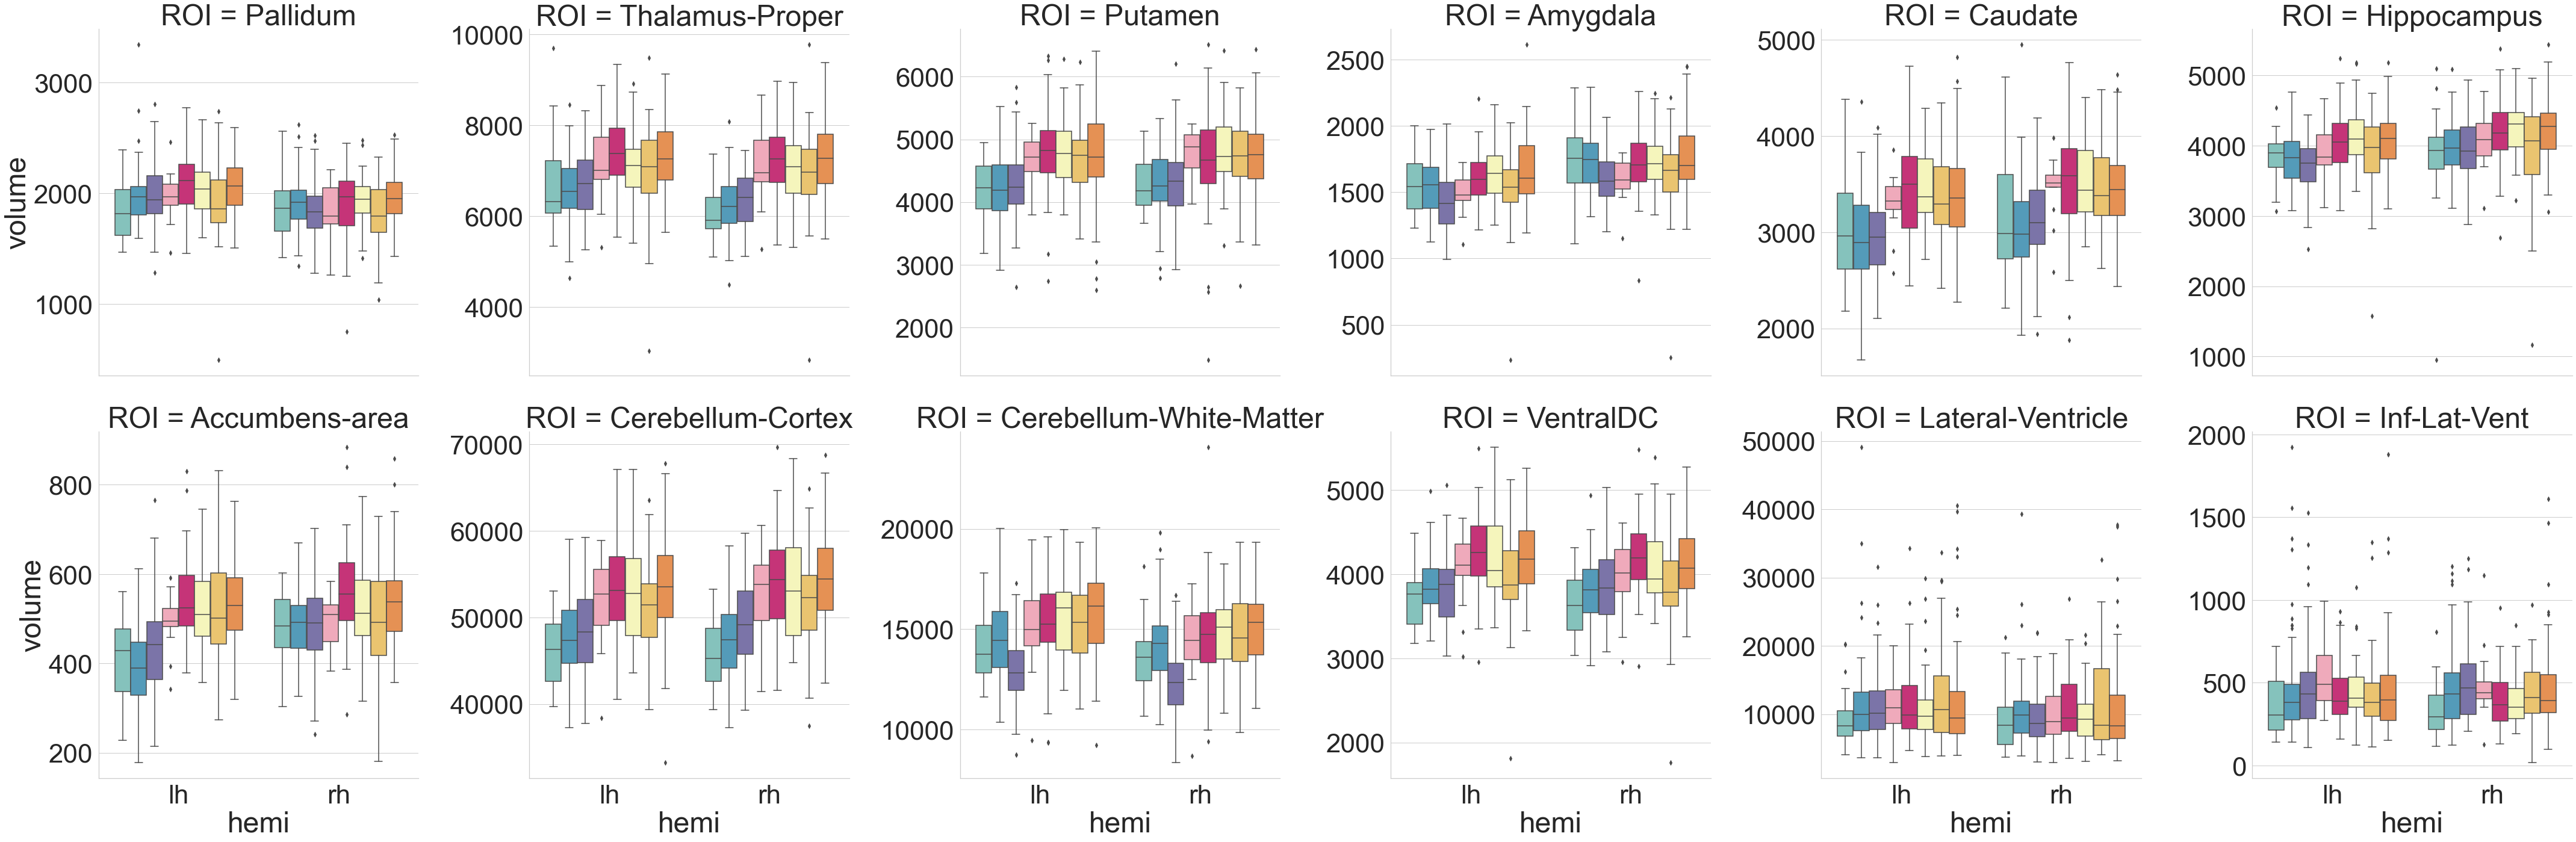

In [32]:
save_fig = False

vol_ASEG_df_melt = hemi_ASEG_df.melt(
    id_vars=demo_cols + ["ds_group"],
    var_name="ROI", 
    value_name="volume",
)

plot_df = vol_ASEG_df_melt.copy()
plot_df["ROI"] = plot_df["ROI"].astype(str)
hemi_roi_list = ['Pallidum', 'Thalamus-Proper', 'Putamen',  'Amygdala', 'Caudate', 'Hippocampus', 'Accumbens-area', 
                'Cerebellum-Cortex','Cerebellum-White-Matter','VentralDC', 'Lateral-Ventricle','Inf-Lat-Vent']

sns.set(font_scale=4)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y="volume",x="hemi", hue="ds_group", col="ROI",kind="box", col_wrap=6, col_order=hemi_roi_list, hue_order=hue_order,
    palette=palette, data=plot_df, aspect=1, height=10, sharey=False, legend=False)
    # g.tick_params(axis='x', rotation=90, labelsize=14)

if save_fig:
    g.savefig(f"{figs_dir}/ASEG_hemi.png")

### Global volumes

In [33]:
# NIMHANS (SERB + METAL)
nimhans_serb_global_ASEG_df = pd.read_csv(f"{nimhans_serb_agg_data_dir}{global_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_serb_global_ASEG_df["dataset"] = "NIMHANS_SERB"
n_nimhans_serb_participants = len(nimhans_serb_global_ASEG_df["participant_id"].unique())

nimhans_metal_global_ASEG_df = pd.read_csv(f"{nimhans_metal_agg_data_dir}{global_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_metal_global_ASEG_df["dataset"] = "NIMHANS_METAL"
n_nimhans_metal_participants = len(nimhans_metal_global_ASEG_df["participant_id"].unique())

# QPN
qpn_global_ASEG_df = pd.read_csv(f"{qpn_agg_data_dir}{global_vol_csv}").drop(columns=["Unnamed: 0"])
qpn_global_ASEG_df["dataset"] = "QPN"
n_qpn_participants = len(qpn_global_ASEG_df["participant_id"].unique())

# PPMI
ppmi_global_ASEG_df = pd.read_csv(f"{ppmi_agg_data_dir}{global_vol_csv}").drop(columns=["Unnamed: 0"])
ppmi_global_ASEG_df["dataset"] = "PPMI"
n_ppmi_participants = len(ppmi_global_ASEG_df["participant_id"].unique())

print(f"n_nimhans_participants: {(n_nimhans_serb_participants, n_nimhans_metal_participants)}, n_qpn_participants:{n_qpn_participants}")

if match_age:
    print(f"Matching age < {age_thresh}")

    ppmi_global_ASEG_df = ppmi_global_ASEG_df[ppmi_global_ASEG_df["age"]<age_thresh]
    n_ppmi_participants = len(ppmi_global_ASEG_df["participant_id"].unique())

    qpn_global_ASEG_df = qpn_global_ASEG_df[qpn_global_ASEG_df["age"]<age_thresh]
    n_qpn_participants = len(qpn_global_ASEG_df["participant_id"].unique())
    print(f"n_nimhans_participants: {(n_nimhans_serb_participants, n_nimhans_metal_participants)}, n_qpn_participant:{n_qpn_participants}, n_ppmi_participants: {n_ppmi_participants}")

# Concat
global_vol_ASEG_df = pd.concat([nimhans_serb_global_ASEG_df, nimhans_metal_global_ASEG_df, qpn_global_ASEG_df, ppmi_global_ASEG_df], axis=0)
global_vol_ASEG_df["ds_group"] = global_vol_ASEG_df["dataset"] + "-" + global_vol_ASEG_df["group"]
print(f"global_vol_ASEG_df shape: {global_vol_ASEG_df.shape}")
qpn_global_ASEG_df.head()

n_nimhans_participants: (86, 66), n_qpn_participants:201
Matching age < 63
n_nimhans_participants: (86, 66), n_qpn_participant:81, n_ppmi_participants: 195
global_vol_ASEG_df shape: (428, 23)


,BrainSegNotVentSurf,non-WM-hypointensities,CSF,3rd-Ventricle,EstimatedTotalIntraCranial,4th-Ventricle,BrainSeg,BrainSegNotVent,SubCortGray,Brain-Stem,...,SupraTentorialNotVent,WM-hypointensities,5th-Ventricle,Optic-Chiasm,participant_id,age,sex,group,hemi,dataset
1,1.423165e+06,0.0,1486.500000,1887.400024,1.932300e+06,2606.399902,1457215.0,1423757.0,70481.0,26626.500000,...,1.253226e+06,1731.000000,0.0,212.199997,PD00215,48.5,M,PD,global,QPN
3,1.076999e+06,2.5,1418.699951,1175.000000,1.492908e+06,1684.199951,1114040.0,1077374.0,56202.0,21090.699219,...,9.700843e+05,3868.699951,0.0,121.800003,PD01398,61.9,F,PD,global,QPN
4,8.435806e+05,0.0,871.799988,1069.199951,1.146054e+06,1408.300049,861734.0,843682.0,44332.0,15741.799805,...,7.411936e+05,1220.400024,0.0,114.099998,PD00849,62.2,F,PD,global,QPN
5,1.016271e+06,0.0,1112.900024,1431.000000,1.434878e+06,1837.300049,1040177.0,1016472.0,53094.0,20252.800781,...,8.822462e+05,713.799988,0.0,133.500000,PD01746,55.4,F,control,global,QPN
9,1.187711e+06,0.0,990.000000,1142.800049,1.623276e+06,1678.199951,1208224.0,1187530.0,60897.0,21935.000000,...,1.057140e+06,787.700012,0.0,128.699997,PD01710,50.6,M,PD,global,QPN


In [34]:
plot_df.head()

,participant_id,age,sex,group,hemi,dataset,ds_group,ROI,volume
0,SERB088,54.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD,Lateral-Ventricle,9170.500000
1,SERB058,64.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD,Lateral-Ventricle,7667.399902
2,SERB049,62.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD,Lateral-Ventricle,16945.599609
3,SERB084,NaN,NaN,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD,Lateral-Ventricle,10064.700195
4,SERB063,56.0,M,PD,lh,NIMHANS_SERB,NIMHANS_SERB-PD,Lateral-Ventricle,8531.599609


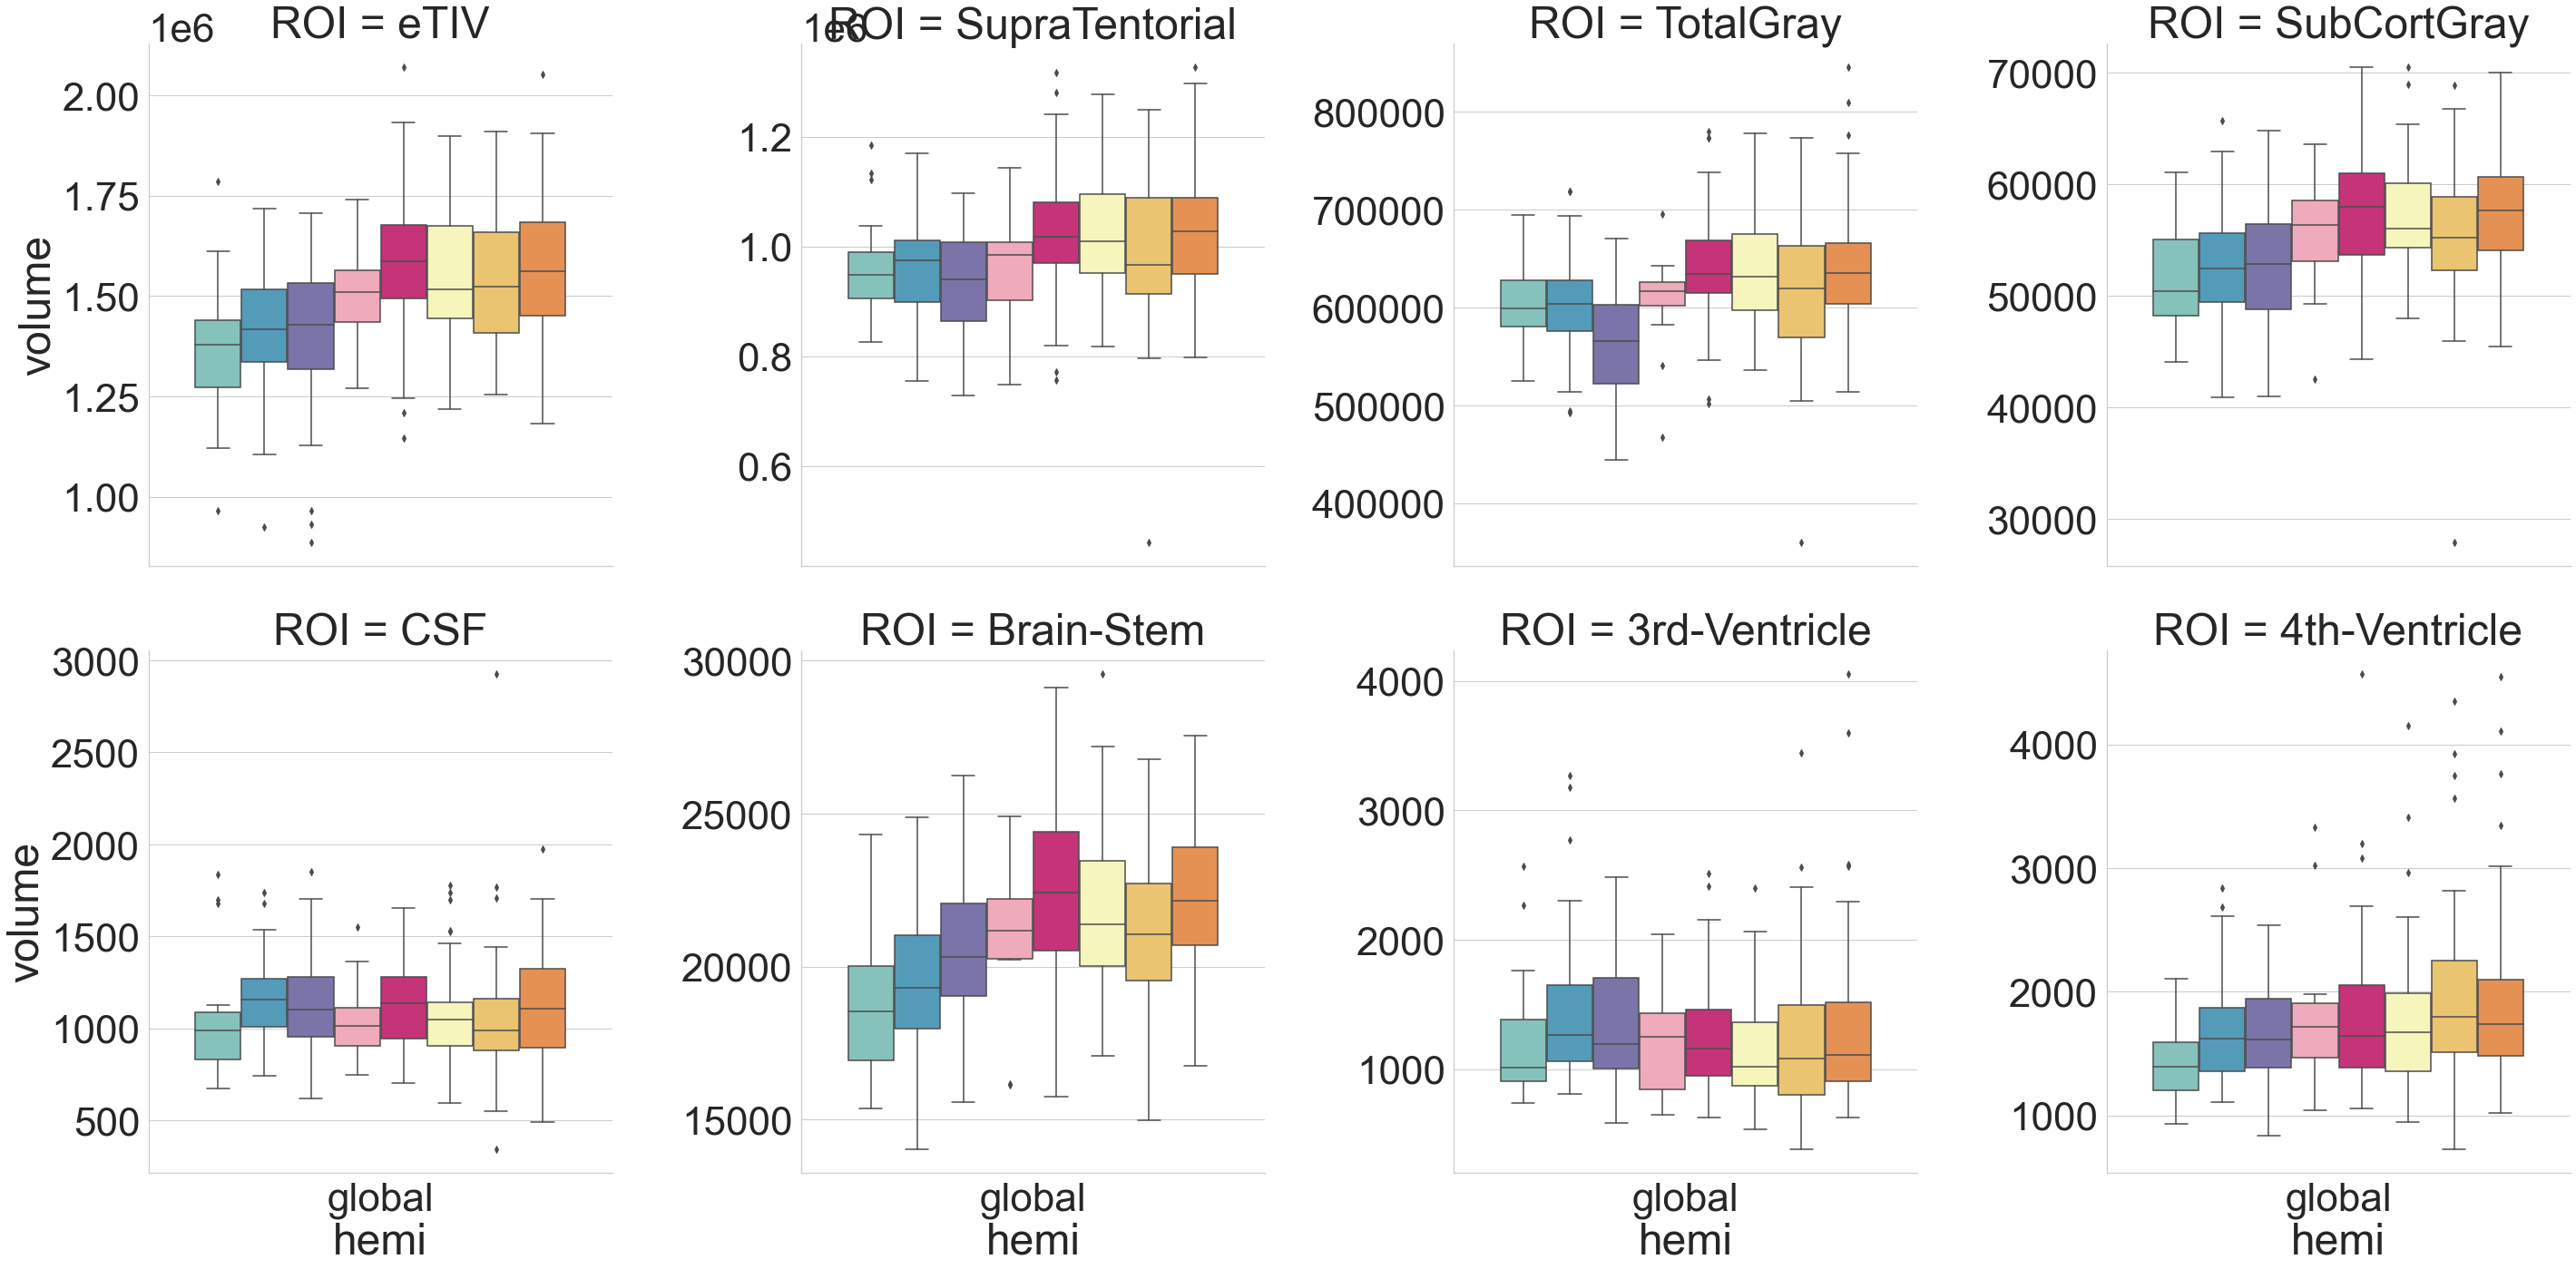

In [35]:
save_fig = False
global_vol_ASEG_df = global_vol_ASEG_df.rename(columns={"EstimatedTotalIntraCranial":"eTIV"})

global_vol_ASEG_df_melt = global_vol_ASEG_df.melt(
    id_vars=demo_cols + ["ds_group"],
    var_name="ROI", 
    value_name="volume",
)

plot_df = global_vol_ASEG_df_melt.copy()

global_roi_list = ["eTIV", "SupraTentorial", "TotalGray", "SubCortGray", 
                    "CSF","Brain-Stem","3rd-Ventricle","4th-Ventricle"]
plot_df = plot_df[plot_df["ROI"].isin(global_roi_list)]

sns.set(font_scale=4)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y="volume",x="hemi", hue="ds_group", col="ROI", kind="box", col_wrap=4, col_order=global_roi_list, hue_order=hue_order,
    palette=palette, data=plot_df, aspect=1, height=10, sharey=False, legend=False)

if save_fig:
    g.savefig(f"{figs_dir}/ASEG_global.png")

### Demographics

In [36]:
demo_df = global_vol_ASEG_df[demo_cols].copy()
demo_df.groupby(["dataset","group"])["participant_id"].count()

dataset        group    
NIMHANS_METAL  PD            66
NIMHANS_SERB   PD            64
               control       22
PPMI           PD           105
               control       42
               prodromal     48
QPN            PD            68
               control       13
Name: participant_id, dtype: int64

In [37]:
demo_df.groupby(["dataset","group"])["age"].describe()

count       mean        std   min    25%   50%  \
dataset       group                                                       
NIMHANS_METAL PD          59.0  53.644068  10.133187  24.0  46.00  55.0   
NIMHANS_SERB  PD          54.0  55.388889   7.199100  36.0  50.25  56.0   
              control     15.0  52.000000   6.011893  41.0  49.00  53.0   
PPMI          PD         105.0  54.247619   5.705566  38.0  50.00  55.0   
              control     42.0  51.642857   7.938242  31.0  46.25  53.5   
              prodromal   48.0  56.187500   4.451422  42.0  53.75  57.0   
QPN           PD          68.0  55.961765   5.299423  40.9  53.20  57.1   
              control     13.0  52.515385   7.785547  37.7  49.80  55.4   

                           75%   max  
dataset       group                   
NIMHANS_METAL PD         61.00  72.0  
NIMHANS_SERB  PD         61.00  67.0  
              control    56.50  60.0  
PPMI          PD         59.00  62.0  
              control    57.75  62.0  
              prodromal  60.00  62.0  
QPN           PD         60.05  62.9  
              control    57.60  62.6